<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alvaro Morales
- Nombre de alumno 2: Eduardo Faundez

### **Link de repositorio de GitHub:** `https://github.com/AlvaroMoralesS/Lab_Faundez_Morales`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

#Clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Regresion
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge 
from xgboost import XGBRegressor

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score

#Busqueda hiperparámetros
from sklearn.model_selection import GridSearchCV

#Libreria para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Definición de semilla
seed = 123

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [4]:
df_players = pd.read_csv('stats_players.csv')
df_players.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [5]:
cond= df_players.National_Position.isnull()

df_players.loc[ cond,'label'] = 0
df_players.loc[~cond,'label'] = 1
labels = df_players.loc[:, "label"]
labels.value_counts()

0.0    16513
1.0     1075
Name: label, dtype: int64

- Existen sólo 1075 seleccionados nacionales de un total de 17588 jugadores.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

Analizando el reporte html, existen variables con alta correlación, las cuales serán eliminadas del conjunto de datos. Esto dado que acarrean casi la misma información, haciendolas redundantes para el entrenamiento de un modelo.

Estas variables son `Dribbling`, `Crossing`, `Short_Pass`, `Shot_Power`, `Long_Shots`, `Curve`, `Finishing`, `Volleys`, `Sliding_Tackle`, `Standing_Tackle`, `Interceptions`, `Long_Pass`, `Speed`, `Finishing`, `Penalties` y `Freekick_Accuracy`

A las variables categoricas se les aplicará One Hot Encoder. Estas son `Nationality`,`Club_Position`,`Preffered_Foot`,`Work_Rate`. Notar que se excluye la variable `Name` dado que es el id de cada fila y `National_Position` que generaría sesgo con variable predictora.

A las variables ordinales se les aplicará Ordinal Encoder. Estas son `Weak_foot` y `Skill_Moves`.

A las variables numéricas se les aplicará MinMax Scaler. Estas son `Height`,`Weight`,`Age`, `Ball_Control`,`Aggression`,`Reactions`, `Vision`,`Composure`,`Acceleration`,`Stamina`,`Strength`, `Balance`,`Agility`,`Jumping` y `Heading`. Como excepción, se aplicará PowerTransformation a `Marking`.




In [6]:
df_players=df_players.drop(columns=['Dribbling','Crossing','Short_Pass',
                                    'Shot_Power','Long_Shots', 'Curve',
                                    'Finishing','Volleys' ,'Sliding_Tackle',
                                    'Standing_Tackle', 'Interceptions',
                                    'Long_Pass','Speed', 'Finishing', 
                                    'Penalties','Freekick_Accuracy'])

In [7]:
Categoricas = ['Nationality','Club_Position','Preffered_Foot','Work_Rate']
Ordinal     = ['Weak_foot','Skill_Moves']
Normal      = ['Height','Weight','Age', 'Ball_Control','Aggression','Reactions',
               'Vision','Composure','Acceleration','Stamina','Strength',
               'Balance','Agility','Jumping','Heading']
Col_power   = ['Marking']


In [8]:
ct = ColumnTransformer(
    transformers=[
        ('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),Categoricas),
        ('Ordinal',OrdinalEncoder(),                      Ordinal),
        ('MinMax' ,MinMaxScaler(),                        Normal),
        ('Power'  ,PowerTransformer(),                    Col_power),
        ], remainder="passthrough")

pipe1 = Pipeline([("preprocesamiento", ct), 
                 ("SVC Linear", SVC(kernel='linear'))])

pipe2 = Pipeline([("preprocesamiento", ct), 
                 ("KNeighbors", KNeighborsClassifier())])

pipe3 = Pipeline([("preprocesamiento", ct), 
                 ("RandomForest", RandomForestClassifier(random_state=seed))])

`Para la elección de modelos, se cuenta con una base donde la variable predicha es categórica, con datos de etiquetado y con una cantidad de registros entre 50 y 100000 observaciones. Es por esto, que se utiliza SVC lineal, KNeighbors Classifier y Random Forest (del grupo de Ensemble Classifiers).`

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [9]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X = df_players.drop(columns=['National_Position','Name','label'])
y = df_players[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [10]:
#entrenamiento de pipeline
pipe1.fit(X_train, y_train.values[:,0])
pipe2.fit(X_train, y_train.values[:,0])
pipe3.fit(X_train, y_train.values[:,0])

#Predicción para test los pipeline
y_test_1 = pipe1.predict(X_test)
y_test_2 = pipe2.predict(X_test)
y_test_3 = pipe3.predict(X_test)

In [11]:
#Impresión resultados
print("SVM kernel lineal:")
print(classification_report(y_test, y_test_1))
print("--------------------------------------------------------------------------")
print("K-Neighbors Classifier")
print(classification_report(y_test, y_test_2))
print("--------------------------------------------------------------------------")
print("Random Forest:")
print(classification_report(y_test, y_test_3))
print("--------------------------------------------------------------------------")

SVM kernel lineal:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      3306
         1.0       0.65      0.21      0.31       212

    accuracy                           0.95      3518
   macro avg       0.80      0.60      0.64      3518
weighted avg       0.93      0.95      0.93      3518

--------------------------------------------------------------------------
K-Neighbors Classifier
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3306
         1.0       0.68      0.10      0.17       212

    accuracy                           0.94      3518
   macro avg       0.81      0.55      0.57      3518
weighted avg       0.93      0.94      0.92      3518

--------------------------------------------------------------------------
Random Forest:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3306
         1.0       0.64      0

**Respuesta**:

```
Se observa que en general, el accuracy de los modelos supera el 90%, lo que indica que clasificaron correctamente más del 90% de los datos en el conjunto. Sin embargo, al evaluar la precisión para la clase seleccionada, se encuentra que este valor es inferior al 70% en todos los modelos evaluados. Esto nos indica que, de todas las predicciones positivas realizadas por los modelos, menos del 70% son correctas.

Además, se observa que el recall de los modelos no supera el 25%. Esto significa que los modelos solo fueron capaces de identificar correctamente, a lo más, un 32% de los jugadores seleccionados.

En vista de estos resultados, se puede afirmar que los modelos tuvieron un desempeño deficiente. Esto se debe a la existencia de un desbalance de clase entre los seleccionados y no seleccionados. La cantidad de muestras por clase influye en el entrenamiento de un modelo y en este caso, el desbalance afecta la capacidad de los modelos para identificar correctamente los casos positivos.

Para mejorar este problema de desbalance de clase, se puede utilizar técnicas de under-sampling y over-sampling. Estas técnicas permiten "equilibrar" las clases y entrenar modelos de manera más eficiente al tener una distribución de muestras más balanceada entre las clases.
```

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [12]:
Asignaciones = {'ST' :0,'CF' :0,
                'RW' :1,'CAM':1, 'LW' :1,
                'RM' :2,'CM' :2, 'LM' :2,
                'RWB':3,'CDM':3, 'LWB':3,
                'RB' :4,'CB' :4, 'LB' :4,
                'GK' :5}

df_players['Posicion'] = df_players['Club_Position'].map(Asignaciones)
df_players2 = df_players[~df_players.Posicion.isnull()]
df_players2 = df_players2.astype({'Posicion':'int'})

In [13]:
df_players2['Posicion'].value_counts()

4    1180
2     907
5     632
1     581
0     430
3     209
Name: Posicion, dtype: int64

In [14]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X = df_players2.drop(columns=['National_Position','Name','label','Posicion','Club_Position'])
y = df_players2[['Posicion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [15]:
Categoricas = ['Nationality','Preffered_Foot','Work_Rate']
Ordinal     = ['Weak_foot','Skill_Moves']
Normal      = ['Height','Weight','Age', 'Ball_Control','Aggression','Reactions',
               'Vision','Composure','Acceleration','Stamina','Strength',
               'Balance','Agility','Jumping','Heading']
Col_power   = ['Marking']

In [16]:
ct = ColumnTransformer(
    transformers=[
        ('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),Categoricas),
        ('Ordinal',OrdinalEncoder(),                      Ordinal),
        ('MinMax' ,MinMaxScaler(),                        Normal),
        ('Power'  ,PowerTransformer(),                    Col_power),
        ], remainder="passthrough")

pipe1 = Pipeline([("preprocesamiento", ct), 
                 ("SVC Linear", SVC(kernel='linear'))])

pipe2 = Pipeline([("preprocesamiento", ct), 
                 ("KNeighbors", KNeighborsClassifier())])

pipe3 = Pipeline([("preprocesamiento", ct), 
                 ("RandomForest", RandomForestClassifier(random_state=seed))])


In [17]:
#entrenamiento de pipeline
pipe1.fit(X_train, y_train.values[:,0])
pipe2.fit(X_train, y_train.values[:,0])
pipe3.fit(X_train, y_train.values[:,0])

#Predicción para test los pipeline
y_test_1 = pipe1.predict(X_test)
y_test_2 = pipe2.predict(X_test)
y_test_3 = pipe3.predict(X_test)

In [18]:
#Impresión resultados
print("SVM kernel lineal:")
print(classification_report(y_test, y_test_1))
print("--------------------------------------------------------------------------")
print("K-Neighbors Classifier")
print(classification_report(y_test, y_test_2))
print("--------------------------------------------------------------------------")
print("Random Forest:")
print(classification_report(y_test, y_test_3))
print("--------------------------------------------------------------------------")

SVM kernel lineal:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        98
           1       0.39      0.32      0.35        96
           2       0.58      0.58      0.58       180
           3       0.46      0.15      0.22        41
           4       0.81      0.96      0.88       240
           5       1.00      1.00      1.00       133

    accuracy                           0.74       788
   macro avg       0.68      0.64      0.64       788
weighted avg       0.72      0.74      0.73       788

--------------------------------------------------------------------------
K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.61      0.60      0.61        98
           1       0.26      0.25      0.25        96
           2       0.41      0.38      0.40       180
           3       0.24      0.10      0.14        41
           4       0.73      0.85      0.79       240
           5   

**Respuesta**:

```
Dado que se mantienen las características del dataset, se mantienen los modelos de clasificación de la etapa anterior.

Las muestras por clase :
4 (defensa)         1180
2 (central)          907
5 (arquero)          632
1 (central_ataque)   581
0 (ataque)           430
3 (central_defensa)  209

- En términos de accuracy, todos los modelos obtuvieron un valor cercano a 70%, que refleja que aproximadamente un 70% de los casos fueron clasificados correctamente.

- Al analizar el recall y la precisión para cada una de las clases, se observa que el desempeño de los modelos no fue uniforme. Para las clases mayoritarias, como la clase defensa o arquero, se obtuvieron buenos resultados, con valores de recall y precisión cercanos al 0.8. Sin embargo, para las clases con pocas muestras, se observó un bajo desempeño, con valores de recall y precisión por debajo de 0.7. Esto es comprensible debido a la dificultad de los modelos para aprender patrones significativos en clases con poca representación.
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [19]:
df_salarios= pd.read_csv('salarios.csv')
df_salarios= df_salarios.rename(columns={'Player': 'Name'})
df_players3 = df_players.merge(df_salarios, on=['Name'], how='inner')
df_players3.head(2)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Stamina,Strength,Balance,Agility,Jumping,Heading,label,Posicion,Unnamed: 0,Weekly Salary
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,92,80,63,90,95,85,1.0,1.0,1006,1248536.0
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,74,59,95,90,68,71,1.0,1.0,1528,1538905.0


In [20]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X = df_players3.drop(columns=['National_Position','Name','label','Weekly Salary','Unnamed: 0','Posicion'])
y = df_players3[['Weekly Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [21]:
Categoricas = ['Nationality','Club_Position','Preffered_Foot','Work_Rate']
Ordinal     = ['Weak_foot','Skill_Moves']
Normal      = ['Height','Weight','Age', 'Ball_Control','Aggression','Reactions',
               'Vision','Composure','Acceleration','Stamina','Strength',
               'Balance','Agility','Jumping','Heading']
Col_power   = ['Marking']

In [22]:
ct = ColumnTransformer(
    transformers=[
        ('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),Categoricas),
        ('Ordinal',OrdinalEncoder(),                      Ordinal),
        ('MinMax' ,MinMaxScaler(),                        Normal),
        ('Power'  ,PowerTransformer(),                    Col_power),
        ], remainder="passthrough")

pipe = Pipeline([("preprocesamiento", ct), 
                 ("Ridge", Ridge())])

In [23]:
#Entrenamiento
pipe.fit(X_train,  y_train.values[:,0])
#Predicción
y_test_1 = pipe.predict(X_test)
#Calculo R2
r2_1 = r2_score(y_test, y_test_1)

print('R^2 Ridge Regression=',r2_1)
print('--------------------------------------------------------------------')

R^2 Ridge Regression= 0.27675653915787013
--------------------------------------------------------------------


In [24]:
param_grid = [{"Ridge__alpha": range(1,11,1)}]
gs = GridSearchCV(pipe, param_grid,n_jobs=-1, scoring="r2")
gs.fit(X_train, y_train.values[:,0])

GridSearchCV(estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One_hot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Nationality',
                                                                          'Club_Position',
                                                                          'Preffered_Foot',
                                                                          'Work_Rate']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                       

In [25]:
y_test_2 = gs.predict(X_test)
r2_2 = r2_score(y_test, y_test_2)
print('R^2 Ridge Regression optimizado=',r2_2)
print('--------------------------------------------------------------------')

R^2 Ridge Regression optimizado= 0.3502175845990204
--------------------------------------------------------------------


**Respuesta**:

```
Para la elección del modelo, se cuenta con una base donde la variable predicha es numérica y con una cantidad de registros entre 50 y 100000 observaciones. Es por esto, que se utiliza Ridge Regression.

En primera instancia se obtiene un R^2 de 0.27. Aplicando optimización de hiperparámetros, especificamente sobre alpha en un rango de 1 y 11, se logra mejorar el R^2 a 0.3502.

Una forma de mejorar la predicción, podría ser aumentando la cantidad de observaciones del dataset. Además, sería interesante analizar si existen datos outliers que pudiesen estar distorsionando las predicciones, las cuales deberían ser eliminadas para mejorar los resultados.
```

En la siguiente sección se analiza la problemática con mayor detalle (**bonus**). 

In [38]:
predecir_sueldos = pd.merge(df_players, df_salarios, on='Name', how='inner')
predecir_sueldos = predecir_sueldos.drop(['Unnamed: 0','Posicion'], axis=1)
predecir_sueldos['National_Position'] = predecir_sueldos.fillna('No seleccionado')
predecir_sueldos = predecir_sueldos.dropna()

In [39]:
Categoricas = ['Nationality','Preffered_Foot','Work_Rate']
Ordinal     = ['Weak_foot','Skill_Moves']
Normal      = ['Height','Weight','Age', 'Ball_Control','Aggression','Reactions',
               'Vision','Composure','Acceleration','Stamina','Strength',
               'Balance','Agility','Jumping','Heading']
Col_power   = ['Marking']

In [40]:
ct = ColumnTransformer(
    transformers=[
        ('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),Categoricas),
        ('Ordinal',OrdinalEncoder(),                      Ordinal),
        ('MinMax' ,MinMaxScaler(),                        Normal),
        ('Power'  ,PowerTransformer(),                    Col_power),
        ], remainder="passthrough")

pipe = Pipeline([("preprocesamiento", ct)])

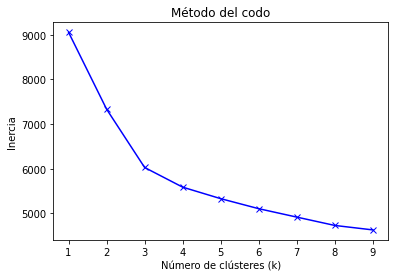

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

predecir_sueldos1=predecir_sueldos.drop(['Name','National_Position','Weekly Salary','Club_Position'], axis=1)
datos_preprocesados1 = pipe.fit_transform(predecir_sueldos1)

# Crear una lista para almacenar los valores de la suma de las distancias al cuadrado (inercia)
inertia_values = []

# Probar diferentes valores de k
k_values = range(1, 10)
for k in k_values:
    # Crear el modelo K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_preprocesados1)
    
    # Obtener la inercia del modelo y añadirla a la lista
    inertia_values.append(kmeans.inertia_)

# Graficar la curva de la suma de las distancias al cuadrado
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [42]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Especifica el número deseado de clústeres
kmeans.fit(datos_preprocesados1)
asignaciones = kmeans.predict(datos_preprocesados1)

predecir_sueldos['Cluster'] = asignaciones
predecir_sueldos11=predecir_sueldos.drop(['Name','Work_Rate','Nationality','National_Position','National_Position','Club_Position','Preffered_Foot'], axis=1)

cluster_mean = predecir_sueldos11.groupby('Cluster').mean()
cluster_mean=cluster_mean.drop(['Height','Weight','Age','Weak_foot','Reactions','Composure','Strength','Jumping'], axis=1)
cluster_mean

,Skill_Moves,Ball_Control,Marking,Aggression,Vision,Acceleration,Stamina,Balance,Agility,Heading,label,Weekly Salary
Cluster,,,,,,,,,,,,
0,2.289912,68.563173,68.569050,71.666993,58.171401,68.893242,74.448580,65.183154,65.817826,64.528893,0.167483,47685.435847
1,1.085470,24.752137,14.025641,29.094017,38.816239,46.119658,35.636752,45.722222,45.871795,18.423077,0.175214,35343.982906
2,3.263502,75.590835,28.531915,56.199673,67.469722,78.271686,69.859247,72.304419,76.734861,58.468085,0.207856,70570.687398


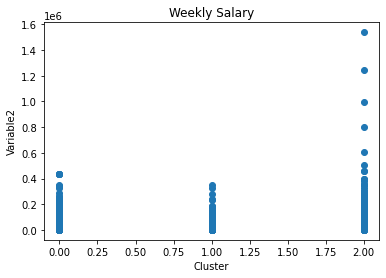

In [43]:
import matplotlib.pyplot as plt
plt.scatter(predecir_sueldos['Cluster'], predecir_sueldos['Weekly Salary'])
plt.xlabel('Cluster')
plt.ylabel('Variable2')
plt.title('Weekly Salary')
plt.show()

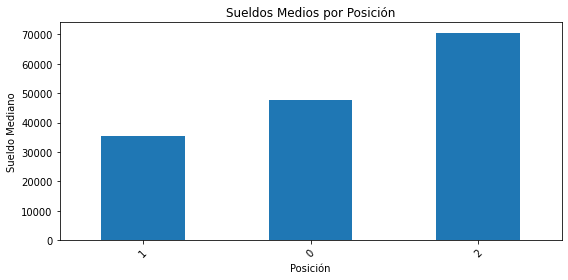

In [44]:
sueldos_por_posicion = predecir_sueldos.groupby('Cluster')['Weekly Salary'].mean()
sueldos_por_posicion = sueldos_por_posicion.sort_values()
plt.figure(figsize=(8, 4))
sueldos_por_posicion.plot(kind='bar')
plt.xlabel('Posición')
plt.ylabel('Sueldo Mediano')
plt.title('Sueldos Medios por Posición')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
Categoricas = ['Nationality','Preffered_Foot','Work_Rate','Weak_foot','Skill_Moves']
Normal      = ['Height','Weight','Age', 'Ball_Control','Aggression','Reactions','Vision','Composure','Acceleration','Stamina','Strength','Balance','Agility','Jumping','Heading']
Col_power   = ['Marking']

transformaciones=[
        ('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),Categoricas),
        ('Power'  ,PowerTransformer(),                    Col_power),
        ('MinMax' ,MinMaxScaler(),                        Normal),
        ('MinMax1' ,MinMaxScaler(),                         Col_power),
        ]

preprocesador = ColumnTransformer(transformaciones, remainder='passthrough')
pipeline_random_forest = Pipeline([
    ('preprocesador', preprocesador),
    ('clasificador',RandomForestRegressor(random_state=42))])



Clusters = [0, 1, 2]

for i in Clusters:
    df_filtrado = predecir_sueldos.loc[predecir_sueldos['Cluster']==i]
    X =df_filtrado.drop(['Name','National_Position','Weekly Salary','Club_Position','Cluster'], axis=1)
    y =df_filtrado['Weekly Salary']

    # Dividir el DataFrame en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline_random_forest.fit(X_train, y_train)
    
    y_test_pred_random_forest = pipeline_random_forest.predict(X_test)
    r2_random_forest = r2_score(y_test, y_test_pred_random_forest)

    print(f'Cluster {i}')
    print(f'R^2 :random forest      {r2_random_forest}\n')
    

Cluster 0
R^2 :random forest      0.4441900507526283

Cluster 1
R^2 :random forest      0.4108908194704902

Cluster 2
R^2 :random forest      0.6707872237005303



**Respuesta**:


**Explique en que consiste la métrica  𝑅2**

La métrica R2, es una medida estadística utilizada para evaluar la calidad de un modelo de regresión. Proporciona información sobre qué tan bien se ajustan los valores predichos por el modelo a los valores observados en el conjunto de datos.
su valor varía entre 0 y 1donde un valor  cercano a 1 indica que el modelo es capaz de explicar una gran parte de la variabilidad de los datos y tiene un buen ajuste. Por otro lado y  un valor cercano a 0 indica que el modelo no puede explicar la variabilidad de los datos y tiene un ajuste deficiente.

**Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?**

En cuanto al caso de la clusterización, se utilizó la data cruda obtenida de la fusión de los DataFrames. Se aplicó el método de K-means para determinar la cantidad de clusters utilizando el método del codo. Técnicamente, se identificaron tres tipos de jugadores: excelentes, intermedios y malos. Se analizó el promedio de los sueldos y la distribución de los sueldos por cluster. Luego, se evaluaron los modelos en cada uno de estos clusters y se obtuvieron mejores resultados en comparación al primer punto, con valores de R cuadrado superiores a 0.4.

Así, se  pudo observar que la estrategia de predicción del sueldo logró cumplir las expectativas, pero con la corrección de predecir el sueldo según el cluster al que pertenece el jugador.

En resumen, se recomienda tener una cantidad suficiente de datos disponibles para el análisis y utilizar características adicionales solo si agregan valor y no están correlacionadas con las variables existentes o la variable objetivo. Esto permitirá obtener un mejor rendimiento de los modelos utilizados.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>